# Notes


## Import dependencies

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import matplotlib.pyplot as plt

## Define a functions

### For scatter plots

In [8]:
def scatter_regress(x_data, y_data, x_name, y_name):

    # to find the values
    correlation, pvalue = st.pearsonr(x_data, y_data)
    rvalue = abs(correlation)
    slope, intercept = np.polyfit(x_data, y_data, 1)
    equation = f"y = {slope:.2f}x + {intercept:.2f}"

    # to generate the scatter plot
    plot = plt.scatter(x_data, y_data, marker='o')
    plt.plot(x_data, slope * x_data + intercept, color='red', label='Line of Best Fit')
    plt.title(f"{x_name} by {y_name}")
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.grid()
    plt.text(np.min(x_data), np.min(y_data), equation, fontsize=12, color='red', verticalalignment='bottom', horizontalalignment='left')
    plt.show()
    plt.savefig(f"scatter_{x_name}_by_{y_name}.png")
    print(f"The r-value is: {rvalue}")
    
    return rvalue, pvalue, slope, intercept, equation, plot

In [9]:
# def histo(x_data, y_data, bin_labels, y_label, title):
#     counts, bins = np.histogram(x_data)
#     plt.bar(bins, y_data)
#     plt.xticks(range(len(bin_labels)), bin_labels)
#     plt.title(title)
#     plt.ylabel(y_label)
#     plt.show()


# plt.hist(x_data, bins)

## Read in the data

In [10]:
# read in data
file = 'universal_top_spotify_songs.csv'
rawdata = pd.read_csv(file)

In [11]:
print(type(rawdata))
print(list(rawdata.columns.values))

<class 'pandas.core.frame.DataFrame'>
['spotify_id', 'name', 'artists', 'daily_rank', 'daily_movement', 'weekly_movement', 'country', 'snapshot_date', 'popularity', 'is_explicit', 'duration_ms', 'album_name', 'album_release_date', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']


## Filter the data

### Filter for countries selected for analysis

In [12]:
relevant_countries = ['US', 'CA', 'BR', 'AR', 'GB', 'DE', 'KR', 'JP', 'NG', 'ZA', 'AU', 'NZ']
data = rawdata[rawdata['country'].isin(relevant_countries)]
len(data)

13820

### Extract data for analysis
- 'popularity' vs. 'danceability'
- 'popularity' vs. 'energy'
- 'popularity' vs. 'acousticness'
- 'popularity' vs. 'instrumentalness'
- 'popularity' vs 'album_release_date'

In [13]:
popularity = data['popularity']
dance = data['danceability']
acoustics = data['acousticness']
instrument = data['instrumentalness']
release = data['album_release_date']

### Generate plots

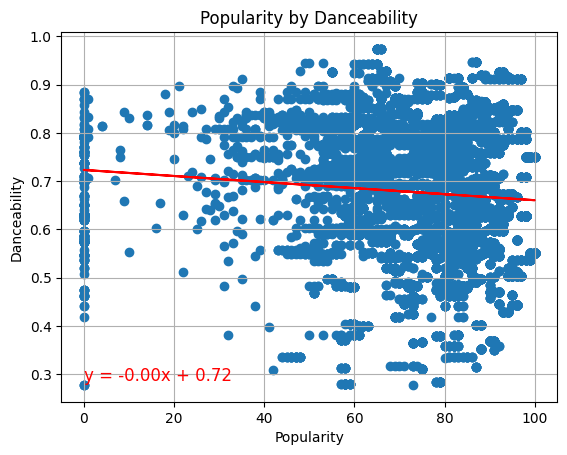

The r-value is: 0.0743600705012486


(0.0743600705012486,
 2.0777912472120453e-18,
 -0.000627092384292498,
 0.7233271559831328,
 'y = -0.00x + 0.72',
 <matplotlib.collections.PathCollection at 0x167bb1050>)

<Figure size 640x480 with 0 Axes>

In [14]:
scatter_regress(popularity, dance, 'Popularity', 'Danceability')

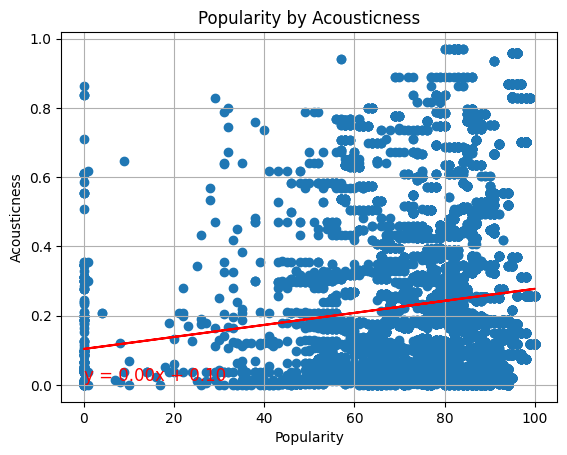

The r-value is: 0.11816625421292443


(0.11816625421292443,
 3.6679379839175617e-44,
 0.0017353277826546803,
 0.10385473735897004,
 'y = 0.00x + 0.10',
 <matplotlib.collections.PathCollection at 0x167c7ae10>)

<Figure size 640x480 with 0 Axes>

In [15]:
scatter_regress(popularity, acoustics, 'Popularity', 'Acousticness')

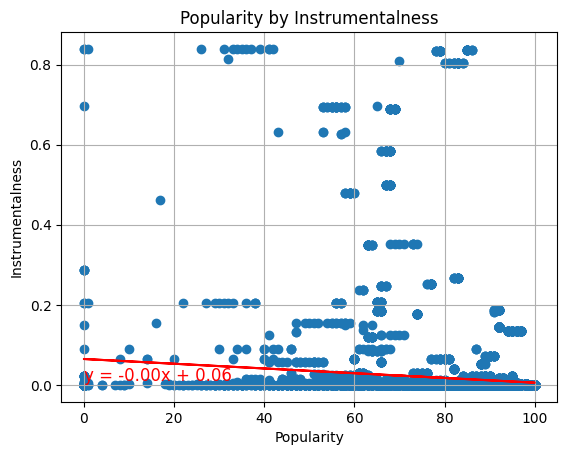

The r-value is: 0.10873140131770084


(0.10873140131770084,
 1.2807355970257456e-37,
 -0.0005916843646499131,
 0.06475777660557083,
 'y = -0.00x + 0.06',
 <matplotlib.collections.PathCollection at 0x167b459d0>)

<Figure size 640x480 with 0 Axes>

In [16]:
scatter_regress(popularity, instrument, 'Popularity', 'Instrumentalness')

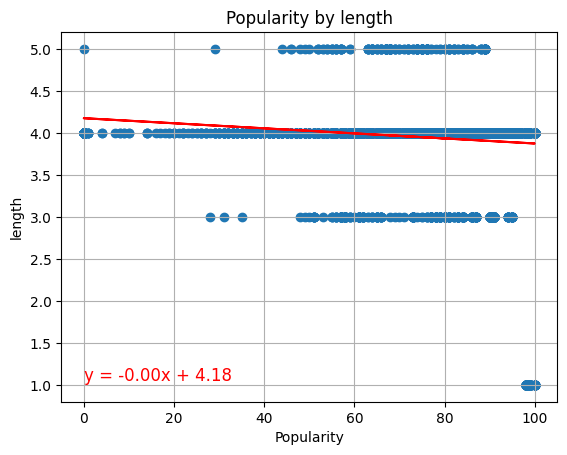

The r-value is: 0.12156312608867811


(0.12156312608867811,
 1.1835299066575541e-46,
 -0.0030091280462042442,
 4.1751571416471505,
 'y = -0.00x + 4.18',
 <matplotlib.collections.PathCollection at 0x155dd75d0>)

<Figure size 640x480 with 0 Axes>

In [15]:
scatter_regress(popularity, data['time_signature'], 'Popularity', 'length')

(array([ 217.,   10.,   30.,   87.,  175.,  733., 1605., 2365., 4632.,
        3966.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

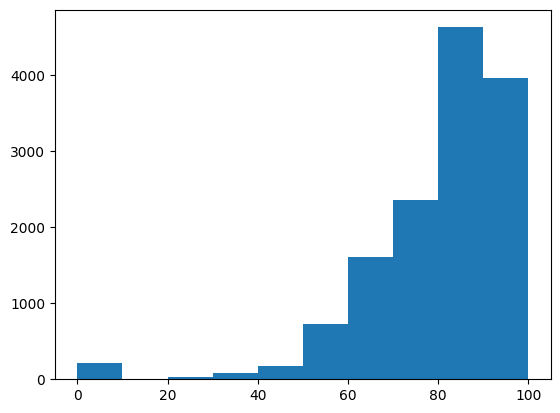

In [7]:
plt.hist(data['popularity'])

In [20]:
data['popularity'].mean()

79.56186685962373